In [ ]:
!pip install numpy==1.26.4
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00



Hybrid vector search is combination of traditional keyword search and modern dense vector search. It has emerged as a powerful tool for e-commerce companies looking to improve the search experience for their customers.

By combining the strengths of traditional text-based search algorithms with the visual recognition capabilities of deep learning models, hybrid vector search allows users to search for products using a combination of text and images. This can be especially useful for product searches, where customers may not know the exact name or details of the item they are looking for.

Pinecone's new **sparse-dense index** allows you to seamlessly perform hybrid search for e-commerce or in any other context. This notebook demonstrates how to use the new hybrid search feature to improve e-commerce search.

## Install Dependencies

First, let's import the necessary libraries


In [ ]:
pip install --force-reinstall sentence-transformers transformers pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 370.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Restart Again after install those

In [ ]:
!pip install -qU datasets transformers sentence-transformers \
                 pinecone-client==3.1.0 pinecone-text \
                 pinecone-notebooks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


## Connect to Pinecone

Let's initiate a connection and create an index. For this, we need to create or login to a Pinecone account and create an API key:

In [ ]:
from pinecone_notebooks.colab import Authenticate

Authenticate()

The API key has been saved to the `PINECONE_API_KEY` environment variable and is ready for us to use to initialize a collection like so:

In [ ]:
import os
from pinecone import Pinecone

# initialize connection to pinecone
api_key = os.environ.get('pcsk_5LNkZb_9nrgqALi5dJMs4VzNH4SkavRsgXT3WVwGjtHA5Bfgss6FT5mgsKxZYoYiMzir8V')

# configure client
pc = Pinecone(api_key=api_key)

setup our index specification, this allows us to define the cloud provider and region where we want to deploy our index. You can find a list of all [available providers and regions here](https://docs.pinecone.io/docs/projects).

In [ ]:
from pinecone import ServerlessSpec

cloud = os.environ.get('PINECONE_CLOUD') or 'aws'
region = os.environ.get('PINECONE_REGION') or 'us-east-1'

spec = ServerlessSpec(cloud=cloud, region=region)

Create index:

In [ ]:
# choose a name for your index
index_name = "hybrid-image-search1"

To use the `sparse-dense` index in Pinecone we must set `metric="dotproduct"`

---

and align the `dimension` value to that of our retrieval model, which outputs `512`-dimensional vectors.

In [ ]:
import time

# check if index already exists (it shouldn't if this is first time)
if index_name not in pc.list_indexes().names():
    # if does not exist, create index
    pc.create_index(
        index_name,
        dimension=512,
        metric='dotproduct',
        spec=spec
    )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
# view index stats
index.describe_index_stats()

{'dimension': 512,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

# Load Dataset

In [ ]:
from datasets import load_dataset

# load the dataset from huggingface datasets hub
fashion = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)
fashion

README.md:   0%|          | 0.00/867 [00:00<?, ?B/s]

(…)-00000-of-00002-6cff4c59f91661c3.parquet:   0%|          | 0.00/136M [00:00<?, ?B/s]

(…)-00001-of-00002-bb459e5ac5f01e71.parquet:   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 44072
})

We will first assign the images and metadata into separate variables and then convert the metadata into a pandas dataframe.

In [ ]:
# assign the images and metadata to separate variables
images = fashion["image"]
metadata = fashion.remove_columns("image")

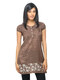

In [ ]:
# display a product image
images[900]

In [ ]:
# convert metadata into a pandas dataframe
metadata = metadata.to_pandas()
metadata.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


We need both sparse and dense vectors to perform hybrid search. We will use all the metadata fields except for the `id` and `year` to create sparse vectors and the product images to create dense vectors.

## Sparse Vectors

To create the sparse vectors we'll use BM25. We import the BM25 function from the [`pinecone-text` library](https://github.com/pinecone-io/pinecone-text).

In [ ]:
from pinecone_text.sparse import BM25Encoder

bm25 = BM25Encoder()

The tokenization will look something like this:

In [ ]:
"Turtle Check Men Navy Blue Shirt".lower().split()

['turtle', 'check', 'men', 'navy', 'blue', 'shirt']

BM25 requires training on a representative portion of the dataset. We do this like so:

In [ ]:
bm25.fit(metadata['productDisplayName'])

  0%|          | 0/44072 [00:00<?, ?it/s]

Let's create a test sparse vector using a `productDisplayName`.

In [ ]:
metadata['productDisplayName'][4]

'Puma Men Grey T-shirt'

In [ ]:
bm25.encode_queries(metadata['productDisplayName'][4])

{'indices': [587940662, 632192512, 2452962424, 64068809],
 'values': [0.35712152740593117,
  0.08332699279132083,
  0.3144282539572345,
  0.2451232258455135]}

And for the stored docs, we only need the "IDF" part:

In [ ]:
bm25.encode_documents(metadata['productDisplayName'][4])

{'indices': [587940662, 632192512, 2452962424, 64068809],
 'values': [0.5177102282645232,
  0.5177102282645232,
  0.5177102282645232,
  0.5177102282645232]}

## Dense Vectors

We will use the CLIP to generate dense vectors for product images. We can directly pass PIL images to CLIP as it can encode both images and texts. We can load CLIP like so:

In [ ]:
from sentence_transformers import SentenceTransformer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load a CLIP model from huggingface
model = SentenceTransformer(
    'sentence-transformers/clip-ViT-B-32',
    device=device
)
model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


SentenceTransformer(
  (0): CLIPModel()
)

In [ ]:
dense_vec = model.encode([metadata['productDisplayName'][0]])
dense_vec.shape

(1, 512)

The model gives us a `512` dimensional dense vector.

## Upsert Documents

Now we can go ahead and generate sparse and dense vectors for the full dataset and upsert them along with the metadata to the new hybrid index. We can do that easily as follows:

In [ ]:
from tqdm.auto import tqdm

batch_size = 200

for i in tqdm(range(0, len(fashion), batch_size)):
    # find end of batch
    i_end = min(i+batch_size, len(fashion))
    # extract metadata batch
    meta_batch = metadata.iloc[i:i_end]
    meta_dict = meta_batch.to_dict(orient="records")
    # concatinate all metadata field except for id and year to form a single string
    meta_batch = [" ".join(x) for x in meta_batch.loc[:, ~meta_batch.columns.isin(['id', 'year'])].values.tolist()]
    # extract image batch
    img_batch = images[i:i_end]
    # create sparse BM25 vectors
    sparse_embeds = bm25.encode_documents([text for text in meta_batch])
    # create dense vectors
    dense_embeds = model.encode(img_batch).tolist()
    # create unique IDs
    ids = [str(x) for x in range(i, i_end)]

    upserts = []
    # loop through the data and create dictionaries for uploading documents to pinecone index
    for _id, sparse, dense, meta in zip(ids, sparse_embeds, dense_embeds, meta_dict):
        upserts.append({
            'id': _id,
            'sparse_values': sparse,
            'values': dense,
            'metadata': meta
        })
    # upload the documents to the new hybrid index
    index.upsert(upserts)

# show index description after uploading the documents
index.describe_index_stats()

  0%|          | 0/221 [00:00<?, ?it/s]

{'dimension': 512,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 44072}},
 'total_vector_count': 44072}

## Querying

Now we can query the index, providing the sparse and dense vectors. We do this directly with an equal weighting between sparse and dense like so:

In [ ]:
query = "dark blue french connection jeans for men"

# create sparse and dense vectors
sparse = bm25.encode_queries(query)
dense = model.encode(query).tolist()
# search
result = index.query(
    top_k=14,
    vector=dense,
    sparse_vector=sparse,
    include_metadata=True
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
imgs

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
 <PIL.Image.Image image mode=RGB size=60x80>]

We return a list of PIL image objects, to view them we will define a function called `display_result`.

In [ ]:
from IPython.core.display import HTML
from io import BytesIO
from base64 import b64encode

# function to display product images
def display_result(image_batch):
    figures = []
    for img in image_batch:
        b = BytesIO()
        img.save(b, format='png')
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="data:image/png;base64,{b64encode(b.getvalue()).decode('utf-8')}" style="width: 90px; height: 120px" >
            </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')

And now we can view them:


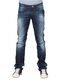
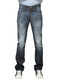
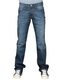
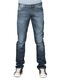
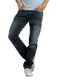
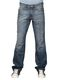
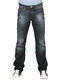
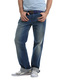
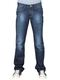
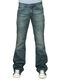
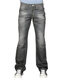
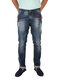
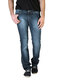
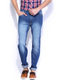

In [ ]:
display_result(imgs)

It's possible to prioritize our search based on sparse vs. dense vector results. To do so, we scale the vectors, for this we'll use a function named `hybrid_scale`.

In [ ]:
def hybrid_scale(dense, sparse, alpha: float):
    """Hybrid vector scaling using a convex combination

    alpha * dense + (1 - alpha) * sparse

    Args:
        dense: Array of floats representing
        sparse: a dict of `indices` and `values`
        alpha: float between 0 and 1 where 0 == sparse only
               and 1 == dense only
    """
    if alpha < 0 or alpha > 1:
        raise ValueError("Alpha must be between 0 and 1")
    # scale sparse and dense vectors to create hybrid search vecs
    hsparse = {
        'indices': sparse['indices'],
        'values':  [v * (1 - alpha) for v in sparse['values']]
    }
    hdense = [v * alpha for v in dense]
    return hdense, hsparse

First, we will do a pure sparse vector search by setting the alpha value as 0.


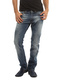
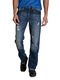
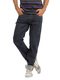
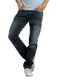
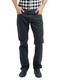
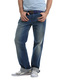
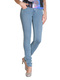
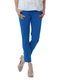
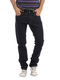
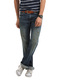
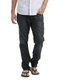
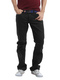
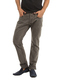
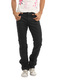

In [ ]:
question = "dark blue french connection jeans for men"

# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=0)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

Let's take a look at the description of the result.

In [ ]:
for x in result["matches"]:
    print(x["metadata"]['productDisplayName'])

French Connection Men Blue Jeans
French Connection Men Blue Jeans
French Connection Men Blue Jeans
French Connection Men Blue Jeans
French Connection Men Blue Jeans
French Connection Men Blue Jeans
French Connection Women Blue Jeans
French Connection Women Blue Jeans
French Connection Men Navy Blue Jeans
French Connection Men Blue paint Stained Regular Fit Jeans
French Connection Men Black Jeans
French Connection Men Black Jeans
French Connection Men Grey Jeans
French Connection Men Black Jeans


We can observe that the keyword search returned French Connection jeans but failed to rank the men's French Connection jeans higher than a few of the women's. Now let's do a pure semantic image search by setting the alpha value to 1.


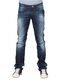
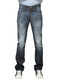
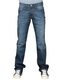
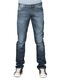
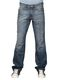
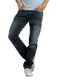
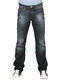
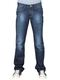
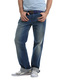
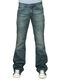
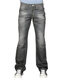
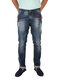
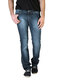
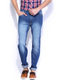

In [ ]:
# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=1)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

In [ ]:
for x in result["matches"]:
    print(x["metadata"]['productDisplayName'])

Locomotive Men Radley Blue Jeans
Locomotive Men Race Blue Jeans
Locomotive Men Eero Blue Jeans
Locomotive Men Cam Blue Jeans
Locomotive Men Ian Blue Jeans
French Connection Men Blue Jeans
Locomotive Men Cael Blue Jeans
Locomotive Men Lio Blue Jeans
French Connection Men Blue Jeans
Locomotive Men Rafe Blue Jeans
Locomotive Men Barney Grey Jeans
Spykar Men Actif Fit Low Waist Blue Jeans
Wrangler Men Blue Skanders Jeans
John Players Men Blue Jeans


The semantic image search correctly returned blue jeans for men, but mostly failed to match the exact brand we are looking for — French Connection. Now let's set the alpha value to `0.05` to try a hybrid search that is slightly more dense than sparse search.


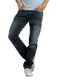
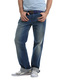
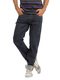
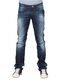
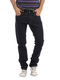
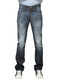
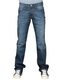
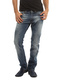
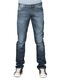
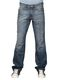
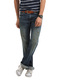
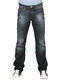
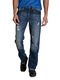
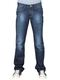

In [ ]:
# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=0.05)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

In [ ]:
for x in result["matches"]:
    print(x["metadata"]['productDisplayName'])

French Connection Men Blue Jeans
French Connection Men Blue Jeans
French Connection Men Blue Jeans
Locomotive Men Radley Blue Jeans
French Connection Men Navy Blue Jeans
Locomotive Men Race Blue Jeans
Locomotive Men Eero Blue Jeans
French Connection Men Blue Jeans
Locomotive Men Cam Blue Jeans
Locomotive Men Ian Blue Jeans
French Connection Men Blue paint Stained Regular Fit Jeans
Locomotive Men Cael Blue Jeans
French Connection Men Blue Jeans
Locomotive Men Lio Blue Jeans


By performing a mostly sparse search with some help from our image-based dense vectors, we get a strong number of French Connection jeans, that are for men, and visually are almost all aligned to blue jeans.

Let's try more queries.


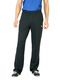
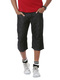
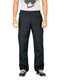
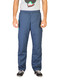
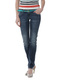
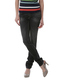
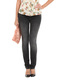
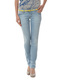
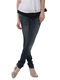
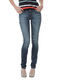
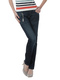
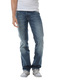
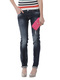
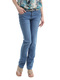

In [ ]:
query = "jeans pant"
# create sparse and dense vectors
sparse = bm25.encode_queries(query)
dense = model.encode(query).tolist()
# scale sparse and dense vectors - keyword search first
hdense, hsparse = hybrid_scale(dense, sparse, alpha=0)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)


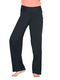
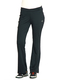
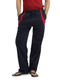
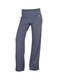
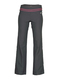
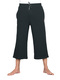
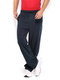
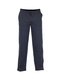
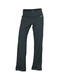
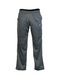
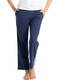
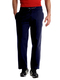
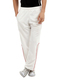
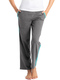

In [ ]:
# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=0.05)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

In [ ]:
for x in result["matches"]:
    print(x["metadata"]['productDisplayName'])

Urban Yoga Women Bottom Black Track Pant
ADIDAS Women Ess Mf Yoga Black Pants
Hanes Men Navy Blue Relaxed Sports Pants
Nike Women's Be Strong Grey Track Pant
Nike Women's Strong Poly Black Track Pant
Urban Yoga Men Bottoms Black Yoga Pants
Nike Men Navy Cricket Track Pants
Nike Men Crickt Black Track Pants
Nike Women Be Strong Black Track Pant
Nike Men Grey Track Pant
Jockey Women Blue Lounge Pants
Urban Yoga Men Navy Blue Track Pants
ADIDAS Men White Track Pant
Jockey Women Grey Lounge Pants


Here we see better aligned handbags.


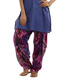
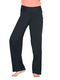
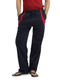
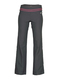
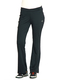
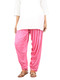
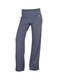
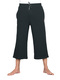
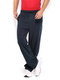
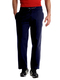
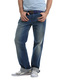
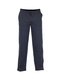
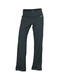
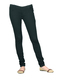

In [ ]:
# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=1)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

If we go too far with dense vectors, we start to see a few purses, rather than handbags.

Let's run some more interesting queries. This time we will use a **product image** to create our dense vector, we'll provide a text query as before that will be used to create the sparse vector, and then we'll select a specific color as per the metadata attached to each image, with [metadata filtering](https://docs.pinecone.io/docs/metadata-filtering).

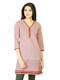

In [ ]:
images[36254]


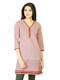
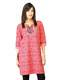
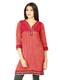
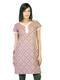
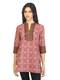
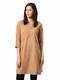
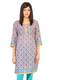
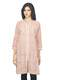
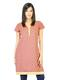
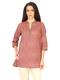
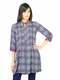
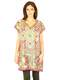
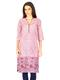
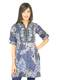

In [ ]:
query = "soft purple topwear"
# create the sparse vector
sparse = bm25.encode_queries(query)
# now create the dense vector using the image
dense = model.encode(images[36254]).tolist()
# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=0.3)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True
)
# use returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

Our "purple" component isn't being considered strongly enough, let's add this to the metadata filtering:


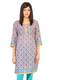
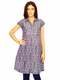
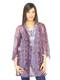
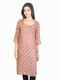
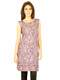
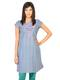
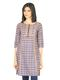
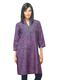
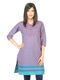
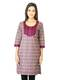
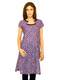
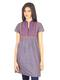
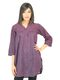
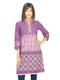

In [ ]:
query = "soft purple topwear"
# create the sparse vector
sparse = bm25.encode_queries(query)
# now create the dense vector using the image
dense = model.encode(images[36254]).tolist()
# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=0.3)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True,
    filter={"baseColour": "Purple"}  # add to metadata filter
)
# used returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

Let's try with another image:

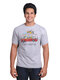

In [ ]:
images[5]


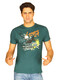
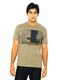
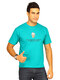
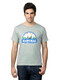
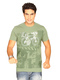
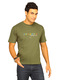
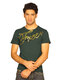
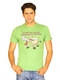
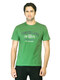
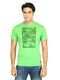
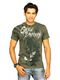
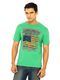
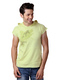
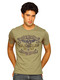

In [ ]:
query = "soft green color topwear"
# create the sparse vector
sparse = bm25.encode_queries(query)
# now create the dense vector using the image
dense = model.encode(images[5]).tolist()
# scale sparse and dense vectors
hdense, hsparse = hybrid_scale(dense, sparse, alpha=0.6)
# search
result = index.query(
    top_k=14,
    vector=hdense,
    sparse_vector=hsparse,
    include_metadata=True,
    filter={"baseColour": "Green"}  # add to metadata filter
)
# use returned product ids to get images
imgs = [images[int(r["id"])] for r in result["matches"]]
# display the images
display_result(imgs)

Here we did not specify the gender but the search results are accurate and we got products matching our query image and description.

---

# UI with Gradio

It show a images through keyword search

In [ ]:
import gradio as gr

def search_products(query):
    # Generate vectors and search
    sparse = bm25.encode_queries(query)
    dense = model.encode(query).tolist()
    hdense, hsparse = hybrid_scale(dense, sparse, alpha=0.3)

    result = index.query(
        top_k=9,
        vector=hdense,
        sparse_vector=hsparse,
        include_metadata=True
    )

    return [images[int(match["id"])] for match in result["matches"]]

# Minimal UI with search button
gr.Interface(
    fn=search_products,
    inputs=gr.Textbox(label="Enter product search"),
    outputs=gr.Gallery(label="Results", columns=3),
    title="Product Image Search",
    description="Type product description and click Search",
    allow_flagging="never",
    live=False,  # Require button click
    submit_btn=gr.Button("🔍 Search")
).launch()

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d936d7d263daa9e7c2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Delete the Index

If you're done with the index, we delete it to save resources.

# 📊 Phân Tích Chi Tiết Các Services

## Tổng Quan Services Layer

Services layer là trái tim của hệ thống, chịu trách nhiệm xử lý:
- **Vector Storage**: Lưu trữ và tìm kiếm embeddings
- **Event Streaming**: Xử lý real-time events
- **Background Processing**: Xử lý bất đồng bộ

---

## 1. 🔍 Vector Store Service (`vector_store.py`)

### 1.1 Tổng Quan
**Mục đích**: Quản lý vector embeddings trong Redis, hỗ trợ similarity search

**Pattern**: Singleton Pattern
- Đảm bảo chỉ có một instance duy nhất
- Tối ưu kết nối Redis
- Shared state across application

### 1.2 Kiến Trúc

```python
RedisVectorStore (Singleton)
├── Redis Client Connection
├── Vector Index Management (HNSW)
├── Embedding Storage
└── Similarity Search
```

### 1.3 Chi Tiết Implementation

#### **1.3.1 Initialization**
```python
def __new__(cls):
    if cls._instance is None:
        cls._instance = super(RedisVectorStore, cls).__new__(cls)
        # Initialize Redis with binary mode for vectors
        cls._instance.redis = redis.Redis(
            decode_responses=False  # Critical for vector bytes
        )
        cls._instance._ensure_vector_index()
```

**Đặc điểm**:
- `decode_responses=False`: Quan trọng để xử lý vector bytes
- Auto-create index nếu chưa tồn tại
- Thread-safe singleton

#### **1.3.2 Vector Index (HNSW)**
```python
def _ensure_vector_index(self):
    self.redis.execute_command(
        "FT.CREATE", VECTOR_INDEX_NAME,
        "ON", "HASH",
        "PREFIX", 1, "product:embedding:",
        "SCHEMA", "vector", "VECTOR", "HNSW", 6,
        "TYPE", "FLOAT32",
        "DIM", VECTOR_DIMENSION,  # 384
        "DISTANCE_METRIC", "COSINE"
    )
```

**Cấu hình HNSW**:
- **Algorithm**: HNSW (Hierarchical Navigable Small World)
- **M (HNSW parameter)**: 6
- **Dimension**: 384 (từ TF-IDF model)
- **Distance Metric**: Cosine similarity
- **Storage**: FLOAT32 (4 bytes per dimension = 1.5KB per vector)

**Redis Structure**:
```
product:embedding:{product_id}
├── vector: [binary FLOAT32 array]
├── category: "electronics"
├── name: "Product Name"
├── price: "99.99"
└── updated_at: "2024-01-01T00:00:00"
```

#### **1.3.3 Store Embedding**
```python
def store_product_embedding(self, product_id: str, embedding: np.ndarray, 
                           metadata: Optional[Dict[str, Any]] = None) -> bool:
    # Convert to binary
    vector_bytes = embedding.astype(np.float32).tobytes()
    
    # Store in Redis Hash
    data = {
        'vector': vector_bytes,
        'updated_at': datetime.utcnow().isoformat(),
        **metadata  # category, name, price
    }
    
    self.redis.hset(f"product:embedding:{product_id}", mapping=data)
```

**Quy trình**:
1. Convert numpy array → FLOAT32 → bytes
2. Combine với metadata
3. Store vào Redis Hash
4. Index tự động update (nhờ RedisSearch)

**Metadata được lưu**:
- `category`: Cho filtering
- `name`: Cho display
- `price`: Cho filtering
- `updated_at`: Cho versioning

#### **1.3.4 Similarity Search**
```python
def find_similar_products(self, embedding: np.ndarray, 
                         limit: int = 10, 
                         min_score: float = 0.75) -> List[Dict[str, Any]]:
    query_vector = embedding.astype(np.float32).tobytes()
    
    # RedisSearch KNN Query
    results = self.redis.execute_command(
        "FT.SEARCH", VECTOR_INDEX_NAME,
        f"*=>[KNN {limit} @vector $query_vector AS score]",
        "PARAMS", 2, "query_vector", query_vector,
        "SORTBY", "score",  # Higher score = more similar
        "RETURN", 4, "id", "score", "category", "updated_at"
    )
```

**KNN Query Breakdown**:
- `*=>[KNN {limit} @vector $query_vector AS score]`:
  - `*`: Match all documents
  - `=>[KNN ...]`: K-Nearest Neighbors search
  - `limit`: Top K results
  - `@vector`: Search in vector field
  - `$query_vector`: Parameter binding
  - `AS score`: Similarity score alias

**Kết quả trả về**:
```python
[
    {
        'product_id': 'prod-123',
        'similarity_score': 0.89,  # Cosine similarity (0-1)
        'category': 'electronics',
        'embedding_updated_at': '2024-01-01T00:00:00'
    },
    ...
]
```

**Performance**:
- **Time Complexity**: O(log N) với HNSW
- **Memory**: ~1.5KB per product embedding
- **Typical Latency**: 10-50ms cho 10K products

#### **1.3.5 Get Embedding**
```python
def get_product_embedding(self, product_id: str) -> Optional[np.ndarray]:
    vector_bytes = self.redis.hget(f"product:embedding:{product_id}", 'vector')
    if not vector_bytes:
        return None
    # Convert bytes back to numpy
    vector = np.frombuffer(vector_bytes, dtype=np.float32)
    return vector
```

**Use Cases**:
- Lấy embedding để tính similarity trước khi search
- Validation embeddings
- Migration/debugging

---

## 2. 📤 Stream Producer Service (`stream_producer.py`)

### 2.1 Tổng Quan
**Mục đích**: Publish product events vào Redis Streams

**Pattern**: Singleton Pattern
- Shared Redis connection
- Event publishing interface

### 2.2 Kiến Trúc

```
ProductEventProducer (Singleton)
├── Redis Streams Connection
├── publish_product_created()
├── publish_product_updated()
└── publish_product_deleted()
```

### 2.3 Chi Tiết Implementation

#### **2.3.1 Initialization**
```python
class ProductEventProducer:
    _instance = None
    
    def __new__(cls):
        if cls._instance is None:
            cls._instance = super(ProductEventProducer, cls).__new__(cls)
            cls._instance.redis = redis.Redis(
                decode_responses=True  # JSON strings
            )
```

**Đặc điểm**:
- `decode_responses=True`: Xử lý JSON strings
- Singleton để reuse connection
- Lazy initialization

#### **2.3.2 Publish Events**
```python
def publish_product_created(self, product_data: Dict[str, Any]) -> Optional[str]:
    event = {
        'event_type': 'create',
        'timestamp': datetime.utcnow().isoformat(),
        'data': json.dumps(product_data),  # Serialize
        'product_id': product_data['id']
    }
    
    # Add to Redis Stream
    event_id = self.redis.xadd(PRODUCT_STREAM_KEY, event)
    return event_id  # Stream entry ID
```

**Event Structure**:
```json
{
    "event_type": "create|update|delete",
    "product_id": "prod-123",
    "timestamp": "2024-01-01T00:00:00",
    "data": "{'name': '...', 'description': '...', ...}"
}
```

**Redis Stream Entry**:
```
product:updates
├── Entry ID: "1234567890-0" (timestamp-sequence)
└── Fields: event_type, product_id, timestamp, data
```

#### **2.3.3 Event Types**

**1. Create Event**:
```python
publish_product_created(product_data)
# Full product data in 'data' field
```

**2. Update Event**:
```python
publish_product_updated(product_id, update_data)
# Only changed fields in 'data'
```

**3. Delete Event**:
```python
publish_product_deleted(product_id)
# Only product_id in 'data'
```

**Return Value**:
- `event_id`: Stream entry ID (e.g., "1234567890-0")
- `None`: Nếu có lỗi

---

## 3. 🔄 Stream Consumer Service (`stream_consumer.py`)

### 3.1 Tổng Quan
**Mục đích**: Consume events từ Redis Streams, generate embeddings, store vectors

**Pattern**: 
- Consumer Group Pattern (Redis Streams)
- Background Thread Processing
- Graceful Shutdown

### 3.2 Kiến Trúc

```
ProductEventConsumer
├── Redis Consumer Group
├── Background Thread
├── Event Processing Loop
├── Embedding Generation
└── Vector Storage
```

### 3.3 Chi Tiết Implementation

#### **3.3.1 Initialization**
```python
def __init__(self, consumer_id: Optional[str] = None):
    self.redis = redis.Redis(decode_responses=True)
    self.consumer_id = consumer_id or f"worker-{threading.get_ident()}"
    
    # Dependencies
    self.embedding_model = get_embedding_model()
    self.vector_store = get_vector_store()
    
    # Control flags
    self.running = False
    self.thread = None
    
    # Create consumer group
    self._ensure_consumer_group()
```

**Consumer Group Setup**:
```python
def _ensure_consumer_group(self):
    # Create stream if not exists
    if not self.redis.exists(PRODUCT_STREAM_KEY):
        self.redis.xadd(PRODUCT_STREAM_KEY, {'init': 'true'})
    
    # Create consumer group
    self.redis.xgroup_create(
        PRODUCT_STREAM_KEY,
        PRODUCT_STREAM_GROUP,  # "product-processors"
        id='0',  # Start from beginning
        mkstream=True
    )
```

**Consumer Group Benefits**:
- **Load Balancing**: Multiple consumers chia tải
- **Fault Tolerance**: Message reprocessing nếu consumer crash
- **At-least-once Delivery**: Đảm bảo xử lý

#### **3.3.2 Start Consumer**
```python
def start(self, batch_size: int = 10, block_ms: int = 2000) -> None:
    if self.running:
        return
    
    self.running = True
    self.thread = threading.Thread(
        target=self._consume_loop,
        args=(batch_size, block_ms),
        daemon=True  # Dies with main process
    )
    self.thread.start()
```

**Parameters**:
- `batch_size=10`: Số messages xử lý mỗi lần
- `block_ms=2000`: Thời gian block chờ messages (2s)

**Thread Model**:
- **Daemon Thread**: Tự động dừng khi main process dừng
- **Non-blocking**: Không block API requests
- **Background Processing**: Async event handling

#### **3.3.3 Consume Loop**
```python
def _consume_loop(self, batch_size: int, block_ms: int) -> None:
    while self.running:
        streams = {PRODUCT_STREAM_KEY: '>'}  # New messages only
        
        messages = self.redis.xreadgroup(
            groupname=PRODUCT_STREAM_GROUP,
            consumername=self.consumer_id,
            streams=streams,
            count=batch_size,
            block=block_ms  # Wait for messages
        )
        
        if not messages:
            continue  # No new messages
        
        # Process messages
        for stream_name, stream_messages in messages:
            for message_id, message_data in stream_messages:
                try:
                    self._process_message(message_id, message_data)
                    # ACK on success
                    self.redis.xack(PRODUCT_STREAM_KEY, 
                                   PRODUCT_STREAM_GROUP, 
                                   message_id)
                except Exception as e:
                    logger.error(f"Error: {e}")
                    # No ACK = will be reprocessed
```

**Consumer Group Read**:
- `'>'`: Đọc messages mới chưa được consumer khác claim
- Auto-claim: Consumer claim message khi read
- ACK: Confirm sau khi xử lý thành công

**Error Handling**:
- **No ACK**: Message sẽ được reprocess sau PEL (Pending Entry List) timeout
- **Retry Logic**: Automatic retry qua consumer group
- **Logging**: Log errors để debug

#### **3.3.4 Process Message**
```python
def _process_message(self, message_id: str, message_data: Dict[str, str]):
    event_type = message_data.get('event_type')
    product_id = message_data.get('product_id')
    data_str = message_data.get('data', '{}')
    
    if event_type == 'create' or event_type == 'update':
        # Parse product data
        product_data = json.loads(data_str)
        if 'id' not in product_data:
            product_data['id'] = product_id
        
        # Generate embedding
        product_embedding = self.embedding_model.get_product_embedding(product_data)
        
        # Prepare metadata
        metadata = {
            'category': product_data.get('category', 'unknown'),
            'name': product_data.get('name', 'unknown'),
            'price': str(product_data.get('price', 0)),
        }
        
        # Store in vector store
        self.vector_store.store_product_embedding(
            product_id=product_id,
            embedding=product_embedding,
            metadata=metadata
        )
        
    elif event_type == 'delete':
        # Delete embedding
        self.vector_store.delete_product_embedding(product_id)
```

**Processing Flow**:
1. **Parse Event**: Extract event_type, product_id, data
2. **Generate Embedding**: 
   - Combine name + description + category
   - TF-IDF vectorization → 384-dim vector
3. **Store Vector**: Save embedding + metadata vào Redis
4. **ACK Message**: Confirm processing success

**Performance Metrics**:
- **Embedding Generation**: ~5-20ms per product
- **Vector Storage**: ~1-5ms per product
- **Total Processing**: ~10-30ms per product

#### **3.3.5 Graceful Shutdown**
```python
def stop(self) -> None:
    if not self.running:
        return
    
    self.running = False
    if self.thread and self.thread.is_alive():
        self.thread.join(timeout=5.0)  # Wait max 5s
```

**Signal Handling**:
```python
def signal_handler(sig, frame):
    consumer.stop()
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)  # Ctrl+C
signal.signal(signal.SIGTERM, signal_handler)  # Kill command
```

---

## 4. 🚀 Modern Stream Consumer (`modern_stream_consumer.py`)

### 4.1 Tổng Quan
**Mục đích**: Backend-agnostic consumer sử dụng adapter pattern

**Pattern**: Adapter Pattern + Event Handler Pattern

**Khác biệt với Stream Consumer**:
- Không phụ thuộc Redis trực tiếp
- Hỗ trợ nhiều backend (Redis, Supabase, NATS, ...)
- Code sạch hơn, dễ test hơn

### 4.2 Kiến Trúc

```
ModernProductEventConsumer
├── EventProcessor (Adapter Interface)
│   ├── RedisEventProcessor
│   ├── SupabaseEventProcessor
│   └── NATSEventProcessor (future)
├── VectorStore (Adapter Interface)
│   ├── RedisVectorStore
│   └── PineconeVectorStore
└── Event Handler
```

### 4.3 Chi Tiết Implementation

#### **4.3.1 Initialization**
```python
def __init__(self, consumer_id: str = None):
    self.consumer_id = consumer_id or f"modern-worker-{threading.get_ident()}"
    
    # Use adapter factory
    self.event_processor = get_event_processor()  # Interface
    self.vector_store = get_vector_store()  # Interface
    self.embedding_model = get_embedding_model()
    
    # Set event handler
    self.event_processor.set_event_handler(self._handle_event)
```

**Adapter Factory**:
- `get_event_processor()`: Trả về adapter dựa trên config
- `get_vector_store()`: Trả về vector store adapter
- **Flexible**: Dễ dàng switch backend

#### **4.3.2 Event Handler**
```python
def _handle_event(self, event_data: dict) -> None:
    """Backend-agnostic event handler"""
    event_type = event_data.get('event_type')
    product_id = event_data.get('product_id')
    data = event_data.get('data', {})
    
    if event_type in ['create', 'update']:
        self._process_product_upsert(product_id, data)
    elif event_type == 'delete':
        self._process_product_delete(product_id)
```

**Handler Pattern**:
- Event processor gọi handler callback
- Handler không biết backend implementation
- **Decoupled**: Business logic tách khỏi infrastructure

#### **4.3.3 Start/Stop**
```python
def start(self) -> None:
    self.event_processor.start_consumer(self.consumer_id)

def stop(self) -> None:
    self.event_processor.stop_consumer()
```

**Delegation Pattern**:
- Consumer logic được delegate cho adapter
- Mỗi adapter implement theo cách riêng
- **Consistent API**: Same interface, different implementations

---

## 5. 📊 Service Dependencies & Flow

### 5.1 Dependency Graph

```
┌─────────────────┐
│  API Routes     │
└────────┬────────┘
         │
         ├──> Stream Producer ──> Redis Streams
         │
         ├──> Vector Store <─── Stream Consumer
         │         │
         │         ├──> Similarity Search
         │         │
         │         └──> Recommendations
         │
         └──> Embedding Model
```

### 5.2 Complete Flow

#### **Product Creation Flow**:
```
1. POST /products
   │
   ├─> Store product data (Redis Hash)
   │
   └─> Stream Producer.publish_product_created()
       │
       └─> Redis Streams (product:updates)
           │
           └─> Stream Consumer (background)
               │
               ├─> Generate Embedding (TF-IDF)
               │
               └─> Vector Store.store_product_embedding()
                   │
                   └─> Redis Vector Index (HNSW)
```

#### **Recommendation Flow**:
```
1. GET /recommendations/{product_id}/similar
   │
   ├─> Vector Store.get_product_embedding(product_id)
   │
   ├─> Vector Store.find_similar_products(embedding)
   │   │
   │   └─> RedisSearch KNN Query
   │
   └─> Filter & Rank Results
```

---

## 6. 🎯 Design Patterns

### 6.1 Singleton Pattern
- **VectorStore**: Shared Redis connection
- **EventProducer**: Shared Redis connection
- **EmbeddingModel**: Shared model instance

**Benefits**:
- Resource efficiency
- State consistency
- Connection pooling

### 6.2 Adapter Pattern (Modern Consumer)
- **EventProcessorInterface**: Abstract interface
- **RedisEventProcessor**: Redis implementation
- **SupabaseEventProcessor**: Supabase implementation

**Benefits**:
- Backend flexibility
- Easy testing (mock interfaces)
- Code reusability

### 6.3 Consumer Group Pattern
- **Redis Streams**: Consumer groups
- **Load Balancing**: Multiple consumers
- **Fault Tolerance**: Auto-retry

### 6.4 Factory Pattern
- **Adapter Factory**: Create adapters based on config
- **Service Factory**: Create services with dependencies

---

## 7. ⚡ Performance Characteristics

### 7.1 Vector Store
- **Storage**: ~1.5KB per product
- **Search Latency**: 10-50ms (10K products)
- **Scalability**: Linear với HNSW

### 7.2 Stream Producer
- **Publish Latency**: < 5ms
- **Throughput**: 1000+ events/second
- **Reliability**: At-least-once delivery

### 7.3 Stream Consumer
- **Processing Latency**: 10-30ms per product
- **Throughput**: 50-100 products/second
- **Scalability**: Horizontal (multiple consumers)

### 7.4 Modern Consumer
- **Same Performance**: Adapter pattern không ảnh hưởng
- **Flexibility**: Có thể optimize từng adapter

---

## 8. 🔧 Configuration

### 8.1 Environment Variables

```python
# Vector Store
VECTOR_STORE_TYPE = "redis"  # or "pinecone"
VECTOR_DIMENSION = 384
VECTOR_INDEX_NAME = "product:vectors"
SIMILARITY_THRESHOLD = 0.75

# Streams
PRODUCT_STREAM_KEY = "product:updates"
PRODUCT_STREAM_GROUP = "product-processors"
PRODUCT_STREAM_CONSUMER = "worker-{}"

# Redis
REDIS_HOST = "localhost"
REDIS_PORT = 6379
REDIS_DB = 0
```

### 8.2 Tuning Parameters

**Consumer Tuning**:
- `batch_size`: Tăng để throughput cao hơn (nhưng memory cao hơn)
- `block_ms`: Tăng để giảm CPU (nhưng latency cao hơn)

**Vector Store Tuning**:
- `HNSW M`: Tăng để accuracy cao hơn (nhưng memory cao hơn)
- `SIMILARITY_THRESHOLD`: Điều chỉnh theo use case

---

## 9. 🐛 Error Handling

### 9.1 Vector Store
- **Connection Errors**: Retry logic
- **Index Errors**: Auto-create index
- **Storage Errors**: Return False, log error

### 9.2 Stream Producer
- **Publish Errors**: Return None, log error
- **Connection Errors**: Automatic reconnection

### 9.3 Stream Consumer
- **Processing Errors**: No ACK, auto-retry
- **Connection Errors**: Retry loop với backoff
- **Crash Recovery**: Consumer group reprocessing

---

## 10. 📝 Best Practices

### 10.1 Singleton Services
- ✅ Dùng singleton cho shared resources
- ✅ Thread-safe initialization
- ✅ Lazy initialization

### 10.2 Error Handling
- ✅ Always log errors
- ✅ Graceful degradation
- ✅ Retry logic với backoff

### 10.3 Resource Management
- ✅ Close connections properly
- ✅ Graceful shutdown
- ✅ Connection pooling

### 10.4 Monitoring
- ✅ Log processing times
- ✅ Track error rates
- ✅ Monitor consumer lag

---

## 11. 🚀 Future Improvements

### 11.1 Performance
- [ ] Batch embedding generation
- [ ] Async vector storage
- [ ] Caching frequently accessed embeddings

### 11.2 Features
- [ ] Dead letter queue cho failed messages
- [ ] Metrics export (Prometheus)
- [ ] Health check endpoints

### 11.3 Scalability
- [ ] Horizontal scaling cho consumers
- [ ] Partitioning streams by category
- [ ] Distributed vector search

---

## Kết Luận

Services layer là backbone của hệ thống:
- **Vector Store**: Fast similarity search
- **Stream Producer**: Reliable event publishing
- **Stream Consumer**: Background processing
- **Modern Consumer**: Flexible backend support

Tất cả được thiết kế với:
- **Production-ready**: Error handling, logging, monitoring
- **Scalable**: Horizontal scaling support
- **Maintainable**: Clean code, design patterns
- **Flexible**: Adapter pattern cho multiple backends

